<br>
<img style="float: left"; src="img\bip.jpeg" width="60">
<br>
<br>
<br>
<br>

# Day 4 - Data Visualization

# Content:
[1. Data Visualization Theory](#1)  <br>
[2. Data Visualization with Pandas](#2)  <br>
[3. Introduction to Matplotlib](#3)  <br>
[4. Data Visualization with Matplotlib & Seaborn](#4)  <br>

In [1]:
from data.support import *

import warnings
warnings.filterwarnings("ignore")

<a id='1'></a>

# 1. Data Visualization Theory
<!-- requirement: images/visual_variables.jpg -->
<!-- requirement: small_data/goog.json -->
<!-- requirement: images/sample-charts -->

## Different types of data for visualization purposes

For visualization purposes, there are four types of data: **Nominal**, **Ordered**, **Interval**, and **Ratio**.  We give each one below and the associated operations which can be applied to each data type: **Equality**, **Comparison**, **Difference**, **Ratio**:
  
<table>

<tr>
<th>Data Type</th>
<th>Example</th>
<th>Equality</th>
<th>Comparison</th>
<th>Difference</th>
<th>Ratio</th>
</tr>

<tr>
<td>**Nominal**</td>
<td>e.g. countries of the world</td>
<td>`=`,`!=`</td>
<td></td>
<td></td>
<td></td>
</tr>

<tr>
<td>**Ordered**</td>
<td>e.g. bond ratings: A, AA</td>
<td>`=`,`!=`</td>
<td>`>`, `<=`</td>
<td></td>
<td></td>
</tr>

<tr>
<td>**Interval** (location of 0 is arbitrary)</td>
<td>e.g. dates and time, lat-long</td>
<td>`=`,`!=`</td>
<td>`>`, `<=`</td>
<td>`-`</td>
<td></td>
</tr>

<tr>
<td>**Ratio**</td>
<td>e.g. physical measures or values</td>
<td>`=`,`!=`</td>
<td>`>`, `<=`</td>
<td>`-`</td>
<td>`/`</td>
</tr>

</table>



## Seven categories of visual cues
There are seven well-recognized ways of visually encoding data, **Position**, **Size**, **Value** (Saturation or a color), **Texture**, **Color**, **Orientation**, **Shape**.  These are labeled in decreasing order of "accuracy of visual perception."

| Label      | Nominal  | Ordinal | Quantitative (Interval or Ratio) |
| ---------- |:-:|:-:|:-:|
|Position    | N | O | Q |
|Size        |   | O | Q |
|Value       | N | O | Q?|
|Texture     | N | O |   |
|Color       | N | O |   |
|Orientation | N |   |   |
|Shape       | N |   |&nbsp;|


<!-- ![Categories of Visual Cues](img/visual_variables.jpg) -->


## Generic algorithm for creating a visualization
Here is the rough algorithm for how to draw a visualization.

1. Express your message in terms of a few quantitative relationships to be expressed (probably no more than 2 and definitely not more than 3).
1. Rank those quantitative relationships.
1. Use the "accuracy of visual perception" and the table above to think about how to encode the data.

In reality, you probably can't follow this algorithm literally but hopefully this can help you better understand what's going on.

## Practical considerations

### Beware of pie charts:

Stay away from pie charts.  A bar chart is almost always the right answer.
<img src="img/pie-vs-bar.png" alt="Pie versus Bar graph" style="width:60%;">

A line chart is better at showing a trend.
<img src="img/pie-vs-line.jpg" alt="Pie versus Line Graph" style="width:60%;">
<!-- Unless you are trying to show a part / whole relationship.
<img src="img/part-whole.png" alt="Part versus Whole" style="width:80%;"> -->

Helpful images from [SpeakingPPT.com](http://speakingppt.com/why-tufte-is-flat-out-wrong-about-pie-charts/).

Another dangerous thing about pie charts is the possibility of distorting the data by removing the absolute scale/reference points.

<a id='2'></a>

# 2. Data Visualization with Pandas

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


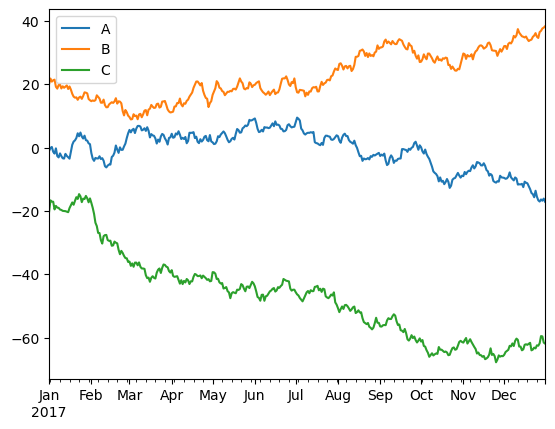

In [4]:
df.plot();
# add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

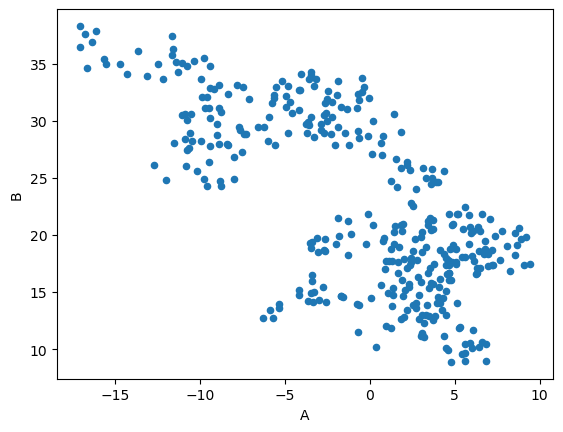

In [5]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

## Scatterplot
A commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle.

A scatterplot is a "scatter" of points, where each point denotes the values of an observation for two selected variables. It is a graphical method for ***detecting relationships between two numerical variables***. The two variables are often labeled generically as *X* and *Y*. The purpose of a scatterplot is to make a relationship (or the lack of it) apparent.


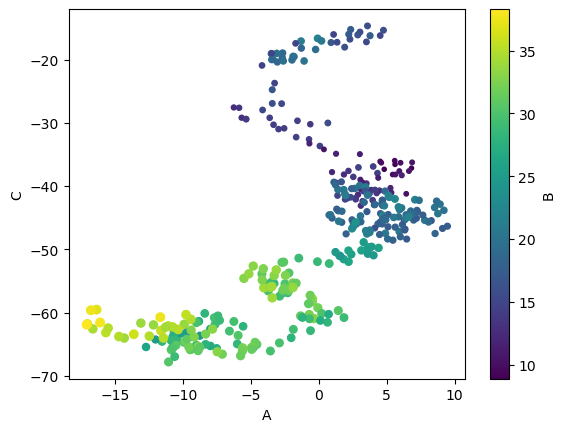

In [6]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis');

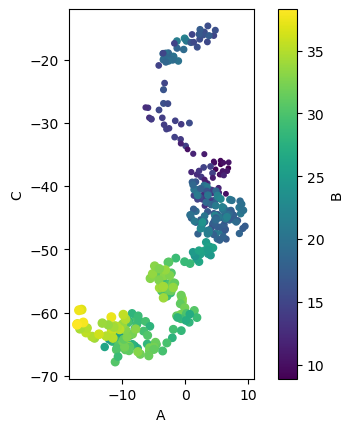

In [7]:
fig = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
fig.set_aspect('equal')

### Box-plot

A box plot (or box-whisker plot) is an alternative type of chart for showing the distribution of a variable.

Boxplots are a very useful graph for dectecting anomalies or outliers within a varibale or dataset.

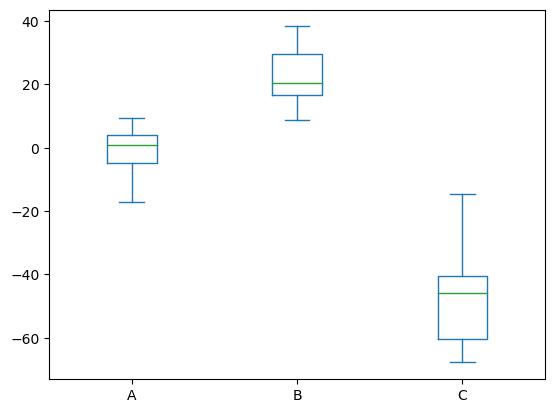

In [8]:
df.plot.box();

## Histogram
A histogram is the most common type of chart for showing the distribution of a numerical variable and it is based on binning a variable, which meand dividing it into discrete categories. Each column represents the counts in the various categories (with no gaps between the vertical bars).

A simple histogram can be a great first step in understanding a dataset; it is very helpful for exploring categorical variables or the shape of a ditribution along an axis, whether the distribution is symmetric or skewed in one direction.

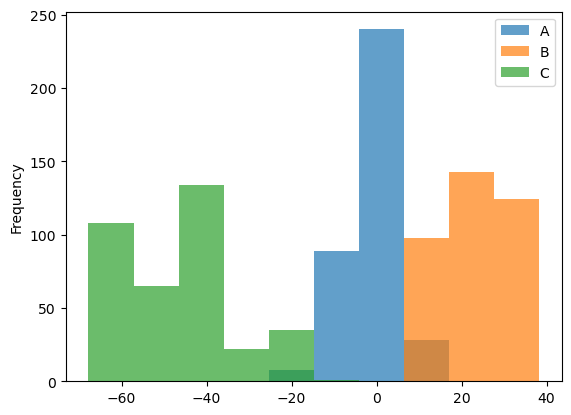

In [9]:
df.plot.hist(alpha=0.7);

### Kernel density estimation plots
[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

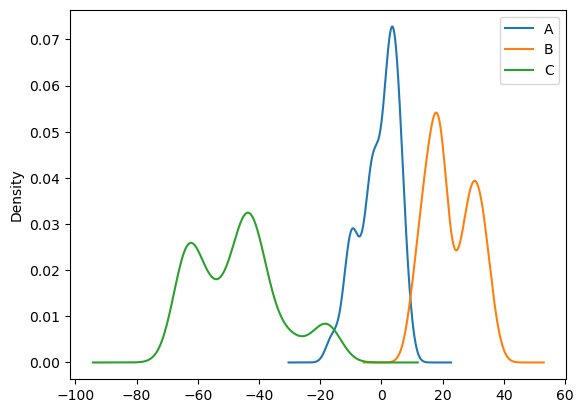

In [10]:
df.plot.kde();

<a id='3'></a>

# 3. Introduction to Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python. Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. .

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;

%matplotlib inline

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is a bounding box with ticks and labels, which will contain the plot elements .

As shown in the below-annotated screenshot, when we draw a graph using plt:

**1.** A ``Figure`` object is generated (shown in green)

**2.** An ``Axes`` object is generated implicitly with the plotted line chart (shown in red)

**3.** All the elements of the plot such as ``x``and ``y-axis`` are rendered inside the Axes object (shown in blue)

Well, if we use some kind of metaphor here:

- ``Figure`` is like a paper that you can draw anything you want
- We have to draw a chart in a “cell”, which is ``Axes`` in this context
- **If we’re drawing only one graph, we don’t have to draw a “cell” first, just simply draw on the paper anyway. So, we can use ``plt.plot(...)``.**

<img src="img/figure.png" alt="Figure" style="width:50%;">

While most ``plt`` functions *(which we will see in the next examples)* translate directly to ``axes`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.

In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

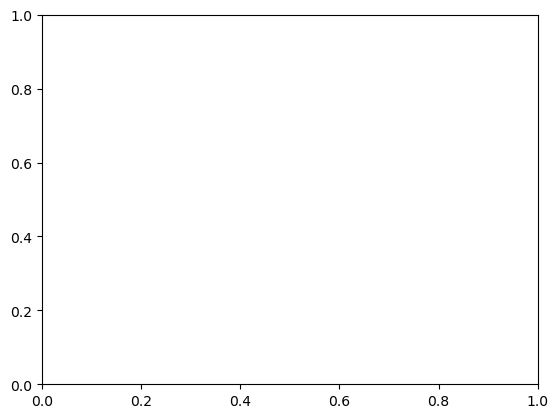

In [12]:
fig = plt.figure()
ax = plt.axes()
plt.rc('figure', figsize=(10, 5))
plt.show()

## Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``seaborn-darkgrid`` style, but is pollible to choose also the `classic` Matplotlib style:

In [13]:
# plt.style.use('classic')
# plt.style.use('seaborn-white')
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-dark')
plt.style.use('seaborn-darkgrid')

## Drawing one or more lines

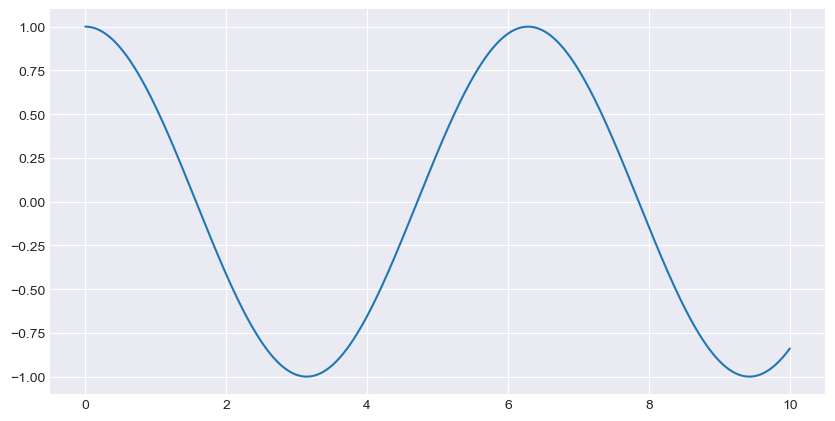

In [14]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.cos(x))

plt.show()

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times

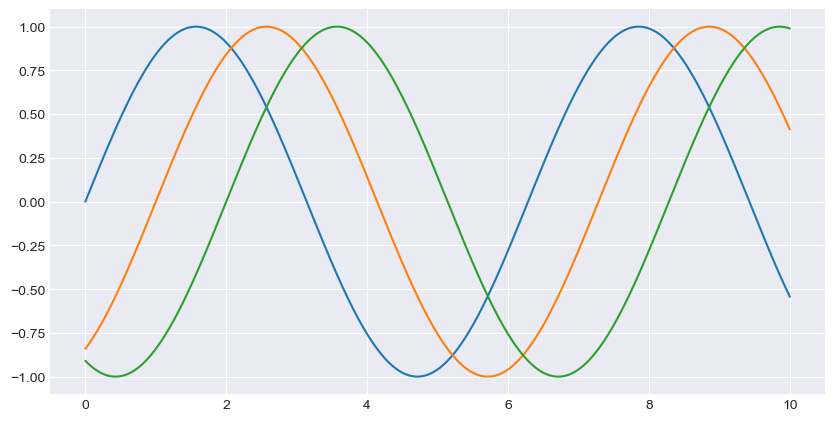

In [15]:
plt.plot(x, np.sin(x - 0))
plt.plot(x, np.sin(x - 1))     
plt.plot(x, np.sin(x - 2))

plt.show()

## Adding Colours
It is possible to add and set colours to lines and shapes by including the argument `colour`. 

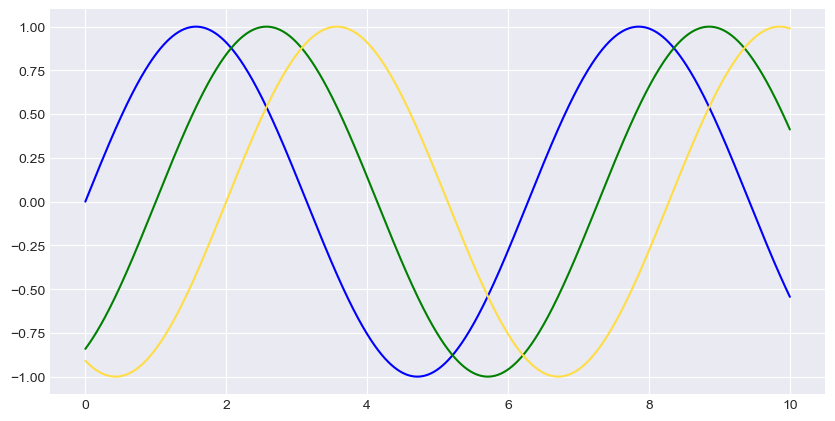

In [16]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='#FFDD44')     # Hex code

plt.show()

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

## Changing Line Stye
Similarly, the line style can be adjusted using the ``linestyle`` keyword:

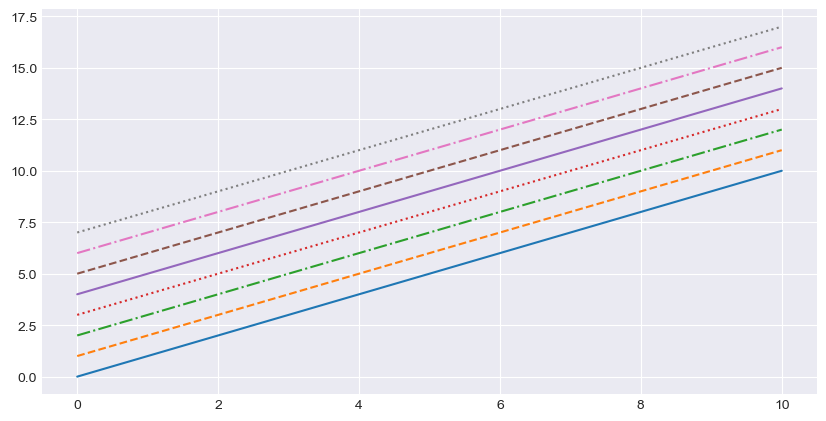

In [17]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

plt.show()

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

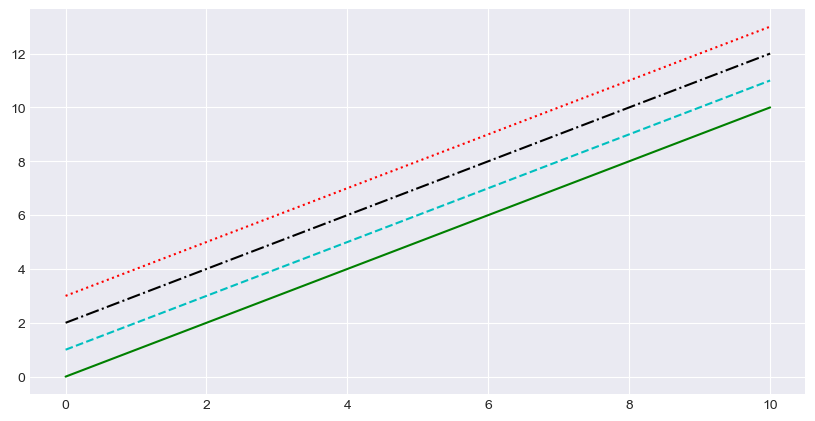

In [18]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

plt.show()

## Changing Markers

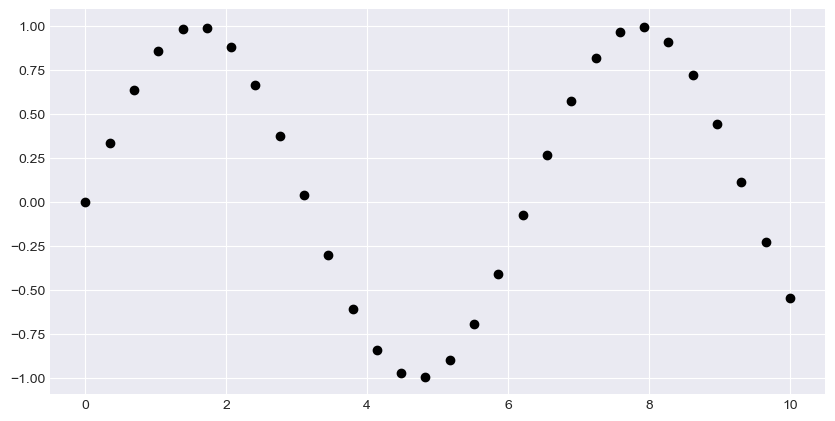

In [19]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');
plt.show()

There are other option for modify default plot markers.

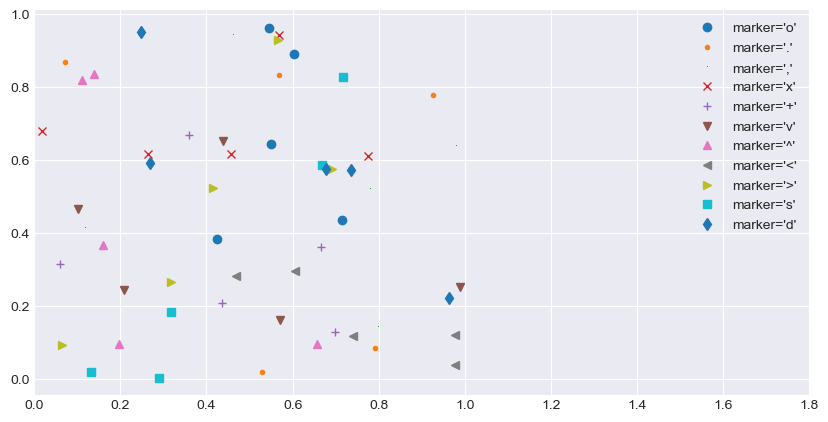

In [20]:
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
    
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

## Adjusting the Plot: Axes Limits

The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

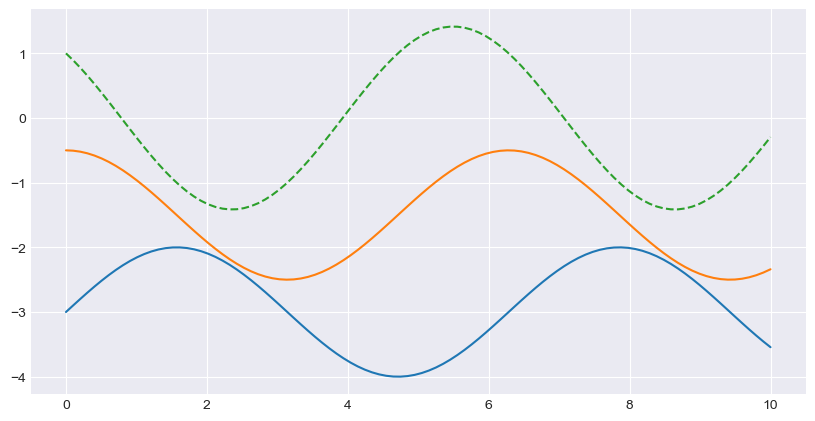

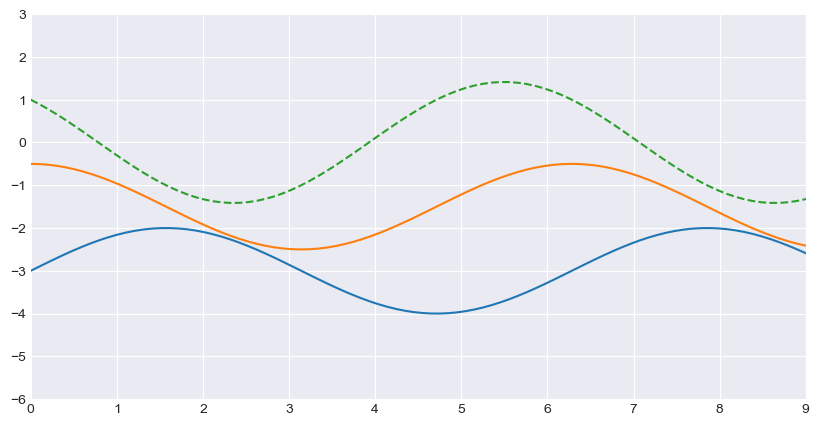

In [21]:
x = np.linspace(0, 10, 100)

# Default axis
fig = plt.figure()
plt.plot(x, np.sin(x) - 3, '-')
plt.plot(x, np.cos(x) - 1.5, '-')
plt.plot(x, np.cos(x)/1- np.sin(x), '--')

# Changes axis
fig1 = plt.figure()
plt.plot(x, np.sin(x) - 3, '-')
plt.plot(x, np.cos(x) - 1.5, '-')
plt.plot(x, np.cos(x)/1- np.sin(x), '--')
plt.xlim(0,9)
plt.ylim(-6, 3);

## Labeling Graph
As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

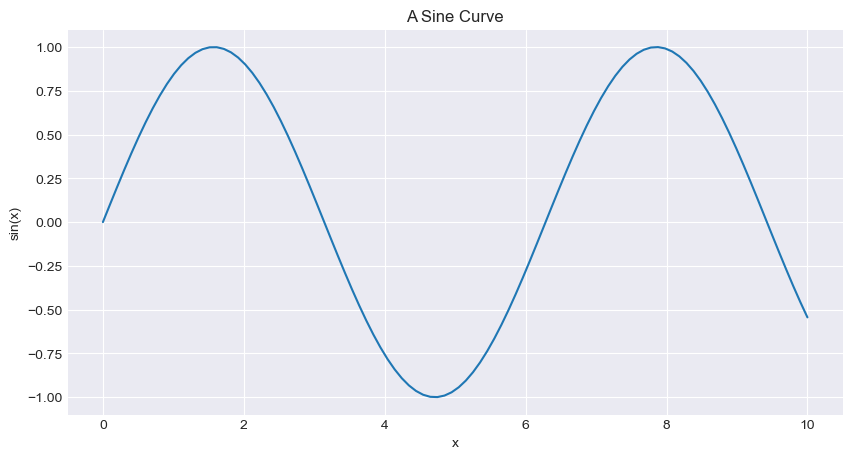

In [22]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

## Adding Legend

Matplotlib has a built-in way of quickly creating such a legend done via the``plt.legend()`` method.

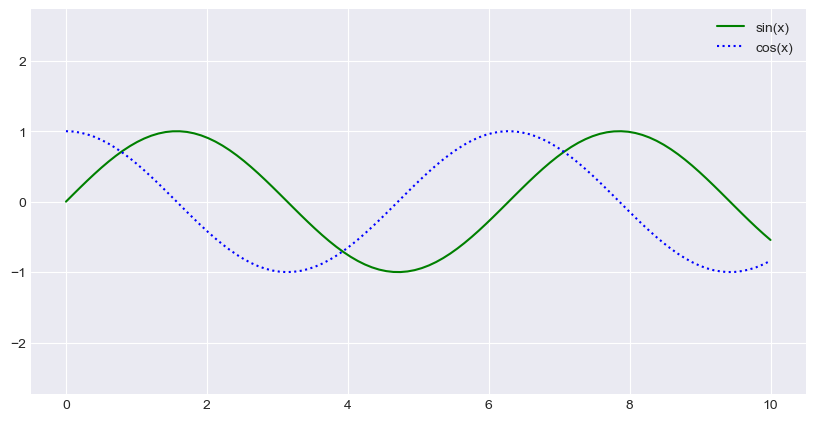

In [23]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()
plt.show()

## Subplots

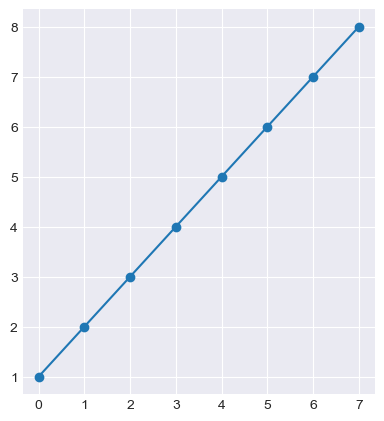

In [24]:
# plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')
plt.show()

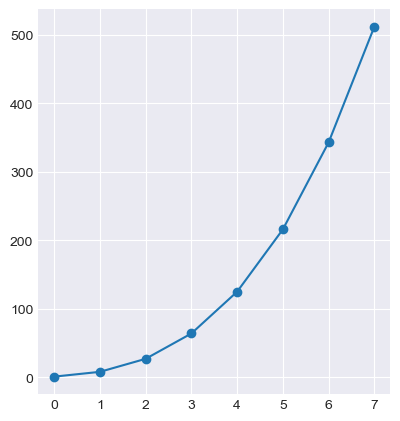

In [25]:
exponential_data = linear_data**3 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')
plt.show()

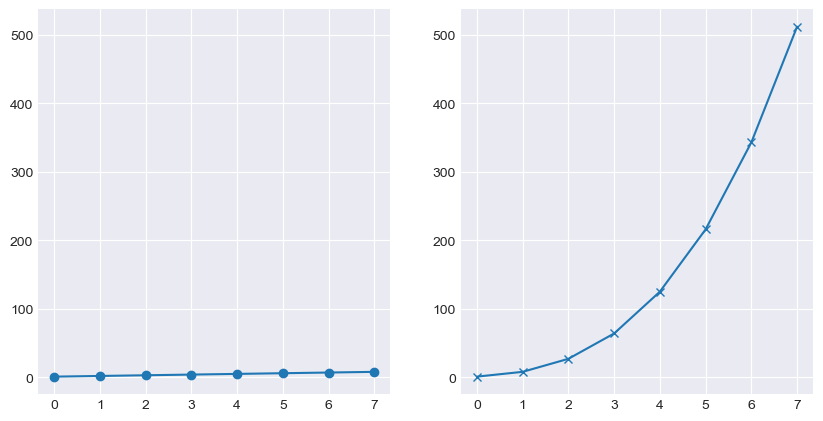

In [26]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

# pass sharey=plt1 to ensure the two subplots share the same y axis
plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

plt.show()

Otherwise we can use the ``plt.subplots`` command which creates the ``Figure`` object and two ``Axes`` objects

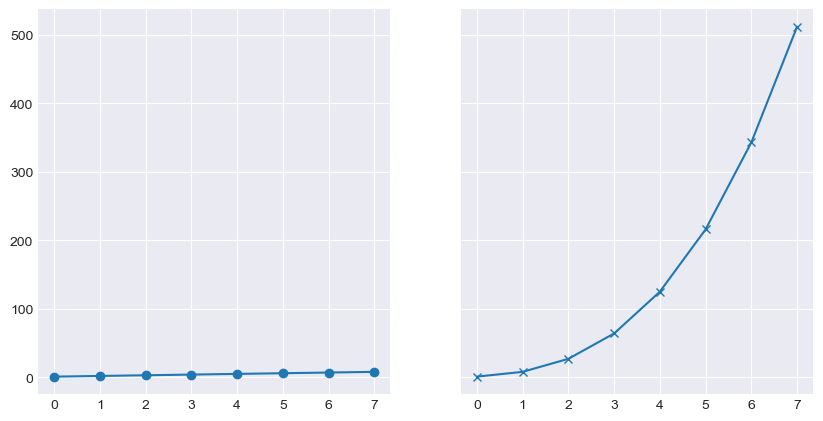

In [27]:
fig, ax = plt.subplots(1, 2, sharey = True)
ax1 = ax[0]
ax2 = ax[1]

ax1.plot(linear_data, '-o')
ax2.plot(exponential_data, '-x')

plt.show()

<a id='4'></a>

# 4. Data Visualization with Matplotlib & Seaborn

## The Dataset: _Credit Card Clients Dataset_

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 28 variables:

- ID: ID of each client

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

- SEX: Gender (male, female)

- EDUCATION: (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others)

- MARRIAGE: Marital status (unknown, married, single, others)

- AGE: Age in years

- PAY_0: Repayment status in September, 2005 (-2=no consumption, -1=paid in full,0=paid the minimum due amount, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- default: Default payment (1=yes, 0=no)

- age_group: Age category (young, middle, senior)
 
- credit_lev: Credit level (bronze, silver, gold)

- pay_avg: Average number of payment default months

In [28]:
# read the csv file (last version)
df = pd.read_csv("data/UCI_Credit_Card_for_matplotlib.csv")
df.columns = map(str.lower, df.columns)
print(df.columns)
df.head()

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'age_group', 'credit_lev', 'pay_avg'], dtype='object')


,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_group,credit_lev,pay_avg
0,1,20000.0,female,2,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,young,bronze,-0.333333
1,2,120000.0,female,2,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,young,silver,0.500000
2,3,90000.0,female,2,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,young,silver,0.000000
3,4,50000.0,female,2,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,middle,bronze,0.000000
4,5,50000.0,male,2,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,senior,bronze,-0.333333


## Basic Line Plot 
The functon ``plt.plot`` by default enables to display a basic line plot.

## Exercise 1

Try to replicate the plot below.

<img src="img/ex_4_1.png" alt="Exercise 1" style="width:60%;">

### Pay attention at all the details:
- Title
- Axis Dimension
- Axis Label 
- Legend
- Markers

*(10 min)*

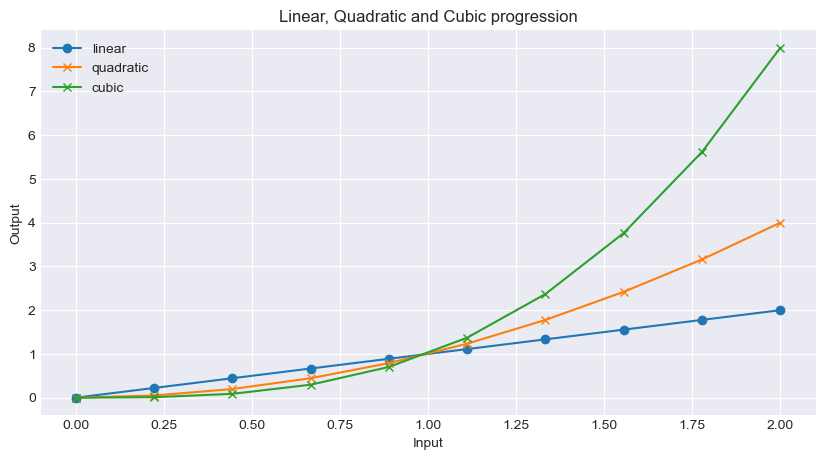

In [29]:
# Write your code here
x = np.linspace(0,2,10)
plt.plot(x,x, "-o", label = "linear");
plt.plot(x,x*x,"-x", label = "quadratic");
plt.plot(x,x*x*x,"-x", label = "cubic");
plt.title("Linear, Quadratic and Cubic progression");
plt.xlabel("Input");
plt.ylabel("Output");
plt.legend();

## Scatterplots

### Scatter Plots with ``plt.plot``

``plt.plot``/``ax.plot`` to produce line plots. It turns out that this same function can produce scatter plots by adding the .`markers`. 

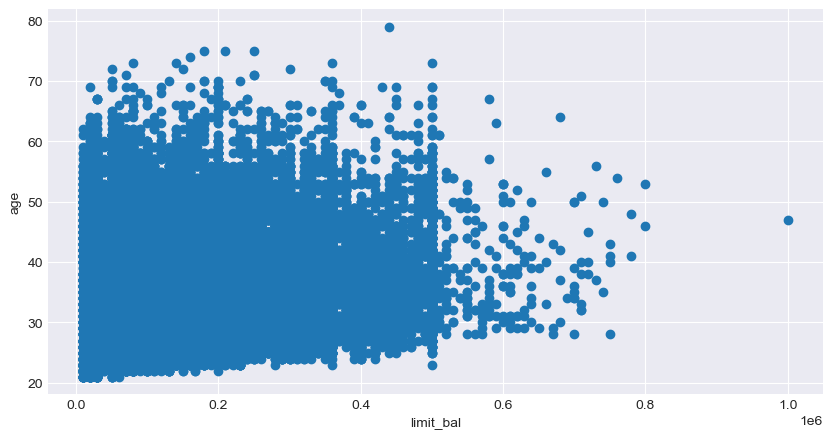

In [30]:
plt.plot(df.limit_bal, df.age, 'o')
plt.xlabel('limit_bal')
plt.ylabel('age')
plt.show()

### Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function.



## Exercise 2

Try to replicate the plot below.

<img src="img/ex_4_2.png" alt="Exercise 2" style="width:60%;">

### Pay attention at:
- use 0.7 trasparency with parameter `alpha`
- use age to `color` the different points 
- use a predefined colormap `viridis` with parameter `cmap`
- add the `colorbar`

#### Colorbar
Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

*(10 min)*

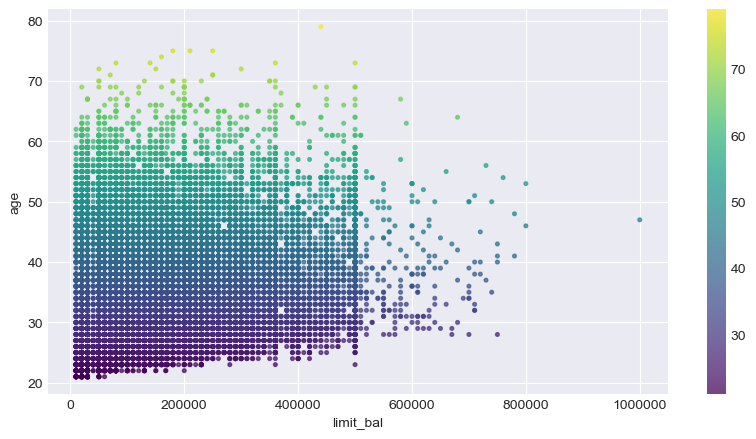

In [31]:
# Write your code here
plt.scatter(df.limit_bal, df.age,c=df.age, cmap = "viridis", alpha = 0.7, s=7);
plt.colorbar();
plt.xlabel("limit_bal");
plt.ylabel("age");
plt.ticklabel_format(style="plain");

## Histograms

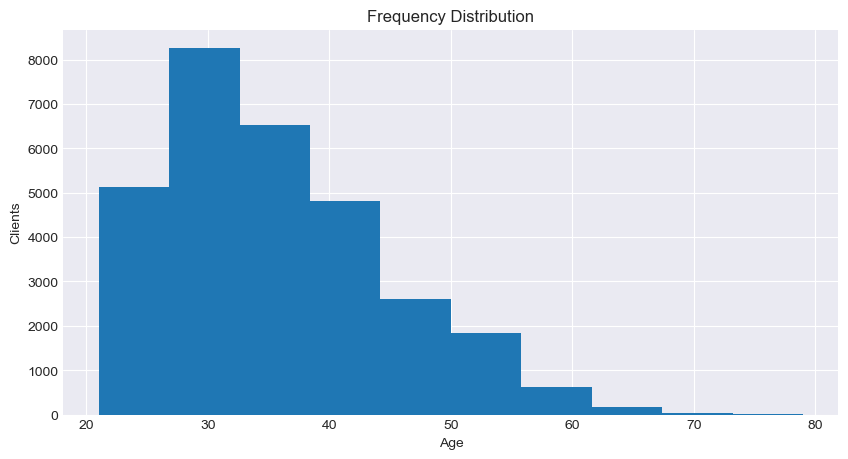

In [32]:
plt.hist(df.age)
plt.title("Frequency Distribution")
plt.xlabel('Age')
plt.ylabel('Clients')
plt.show()

## Exercise 3

Try to replicate the plot below.

<img src="img/ex_4_3.png" alt="Exercise 3" style="width:60%;">

It is possible to display more histograms in the same plot, but remeber to set an `alpha` for trasparency and use same `bins` in plotting two hists.

*(10 min)*

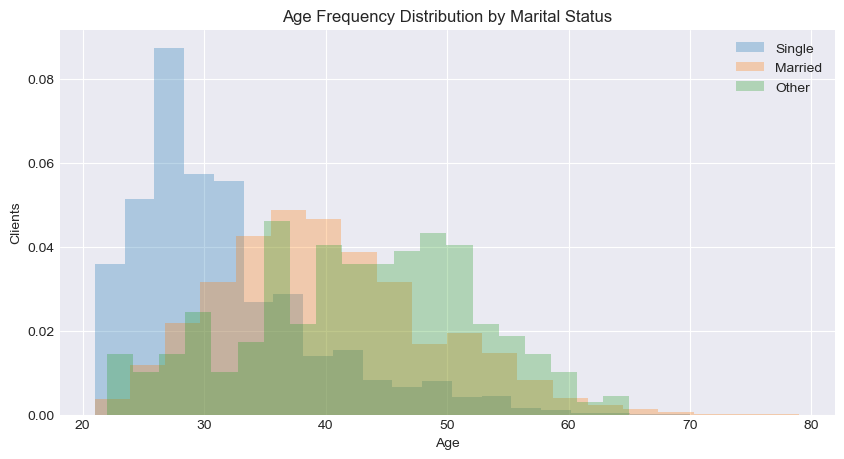

In [33]:
# Write your code here
plt.hist(df["age"].loc[df["marriage"] == "single"],alpha =0.3,density =True,bins=20, label="Single");
plt.hist(df["age"].loc[df["marriage"] == "married"],alpha =0.3,density=True, bins=20, label="Married");
plt.hist(df["age"].loc[df["marriage"] == "others"],alpha =0.3,density= True,bins=20, label="Other");
plt.xlabel("Age");
plt.ylabel("Clients");
plt.legend();
plt.title("Age Frequency Distribution by Marital Status")
plt.show();

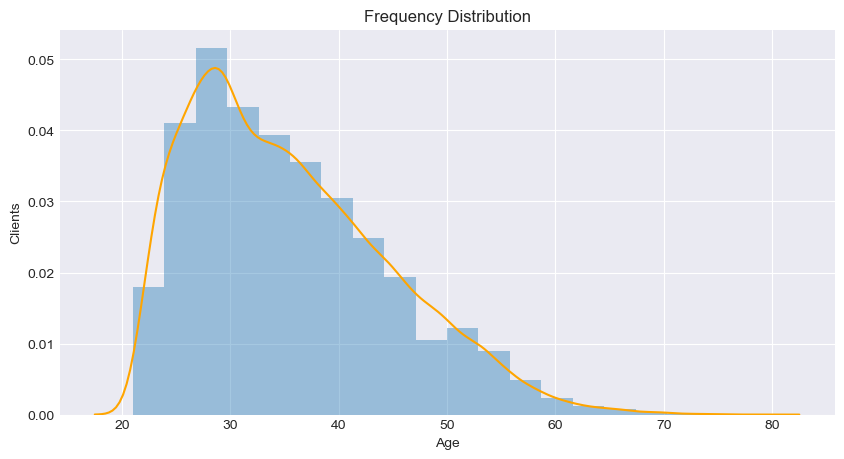

In [34]:
# plt.hist(df.age, alpha = 0.3, density = True, bins = 20)
# sns.kdeplot(df.age, label = '')
sns.distplot(df.age, bins = 20, kde_kws={'color': 'orange'})
plt.title("Frequency Distribution")
plt.xlabel('Age')
plt.ylabel('Clients')# non mettere la y o sistemare 
plt.show()

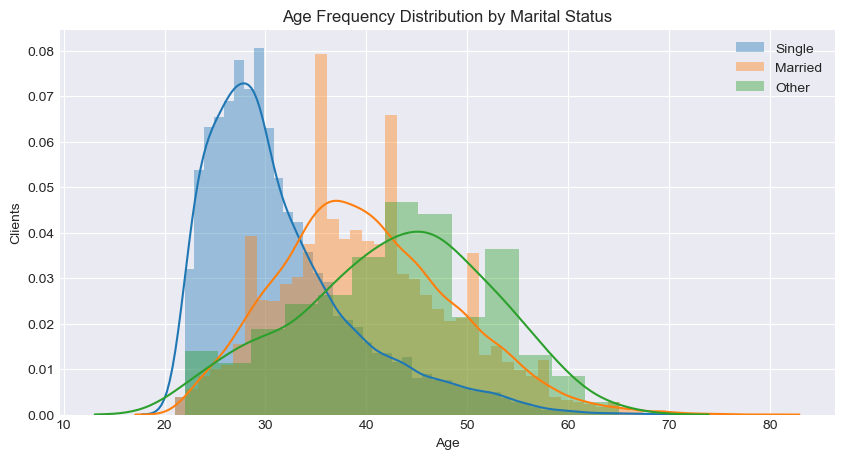

In [35]:
sns.distplot(df.age[df.marriage == 'single'], label='Single')
sns.distplot(df.age[df.marriage == 'married'], label='Married')
sns.distplot(df.age[df.marriage == 'others'], label='Other')
plt.title("Age Frequency Distribution by Marital Status")
plt.xlabel('Age')
plt.ylabel('Clients')
plt.legend()
plt.show()

## Exercise 4

Try to fill the `__` in the following sentences.

The variable **Age** has a `right (or positive) moderately skewed` distribution with mean `35.5` , mode `29` and median `34` years.  

**Single's Age** has a `Highly positively skewed` distribution with mean `31.5` , mode `29` and median `29` years.  
**Married's Age** has a `fairly symmetrical` distribution with mean `40` , mode `37` and median `39` years.  
**Other's Age** has a `fairly symmetrical` distribution with mean `42.8` , mode `48` and median `43.0` years.  


### Remember:
- If the skewness is between -0.5 and 0.5, the data are `fairly symmetrical`.
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are `moderately skewed`.
- If the skewness is less than -1 or greater than 1, the data are `highly skewed`.


*(5 min)*

In [36]:
# Write your code here
print(df.age.mean())
print(df.age.mode())
print(df.age.median())
print(df.age.skew())


35.4855
0    29
Name: age, dtype: int64
34.0
0.7322458687830562


In [37]:
print(df.loc[df["marriage"] == "single"].age.mean())
print(df.loc[df["marriage"] == "single"].age.mode())
print(df.loc[df["marriage"] == "single"].age.median())
print(df.loc[df["marriage"] == "single"].age.skew())

31.452706088699575
0    29
Name: age, dtype: int64
29.0
1.3205370737876245


In [38]:
print(df.loc[df["marriage"] == "married"].age.mean())
print(df.loc[df["marriage"] == "married"].age.mode())
print(df.loc[df["marriage"] == "married"].age.median())
print(df.loc[df["marriage"] == "married"].age.skew())

40.01669229079727
0    37
Name: age, dtype: int64
39.0
0.4452795938725162


In [39]:
print(df.loc[df["marriage"] == "others"].age.mean())
print(df.loc[df["marriage"] == "others"].age.mode())
print(df.loc[df["marriage"] == "others"].age.median())
print(df.loc[df["marriage"] == "others"].age.skew())

42.79876160990712
0    48
Name: age, dtype: int64
43.0
-0.20003551826891924


## 4. Barplot
A **barplot** (or ***barchart***) is one of the most common type of graphic. It shows the relationship between a numeric variable and a categoric variable.

## Exercise 5

Transform the variable education with this transcoding:
- 1 = *graduate*
- 2 = *university*
- 3 = *high_school*
- other values = *others*

*(10 min)*

In [40]:
# Write your code here
df["education"] = [{1:"graduate",2:"university",3:"high_school",0:"others",4:"others"}.get(x) for x in df["education"]]
df["education"]

0         university
1         university
2         university
3         university
4         university
            ...     
29995    high_school
29996    high_school
29997     university
29998    high_school
29999     university
Name: education, Length: 30000, dtype: object

### Let's see 3 different types of barplots and at the end we will try to understand why they are so different

### Barplot with Matplotlib

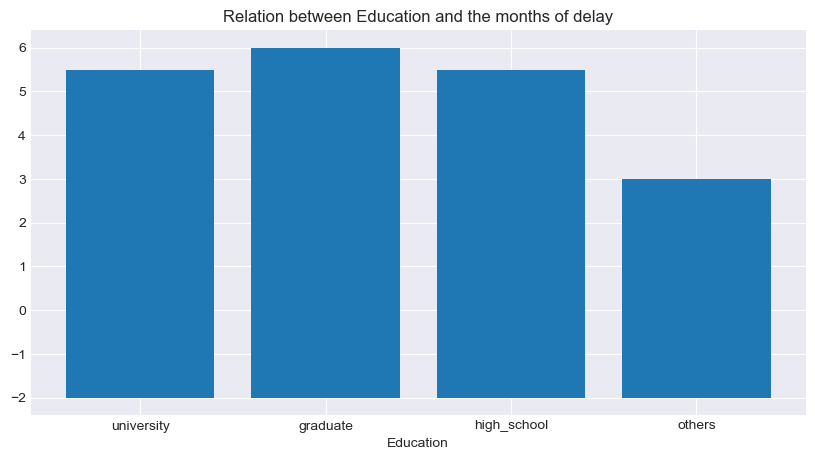

In [47]:
plt.bar(df.education, df.pay_avg)
plt.title('Relation between Education and the months of delay')
plt.xlabel("Education")
plt.show()


### Barplot with Seaborn

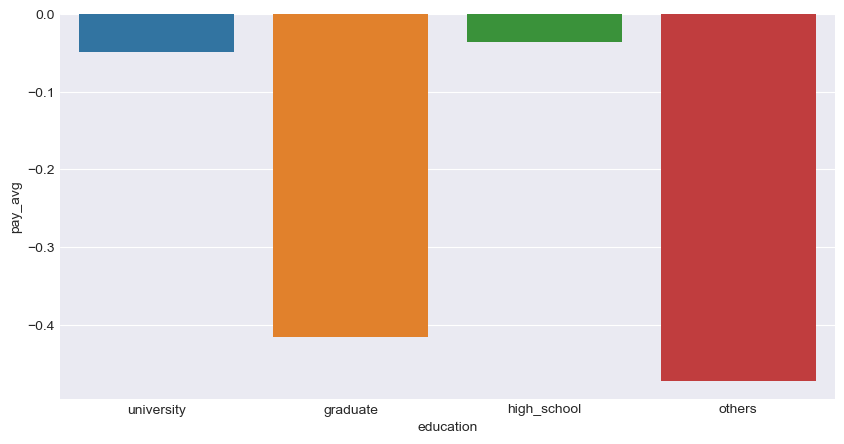

In [49]:
sns.barplot(x=df.education, y=df.pay_avg, ci = None)
plt.show()

### Countplot with Seaborn 

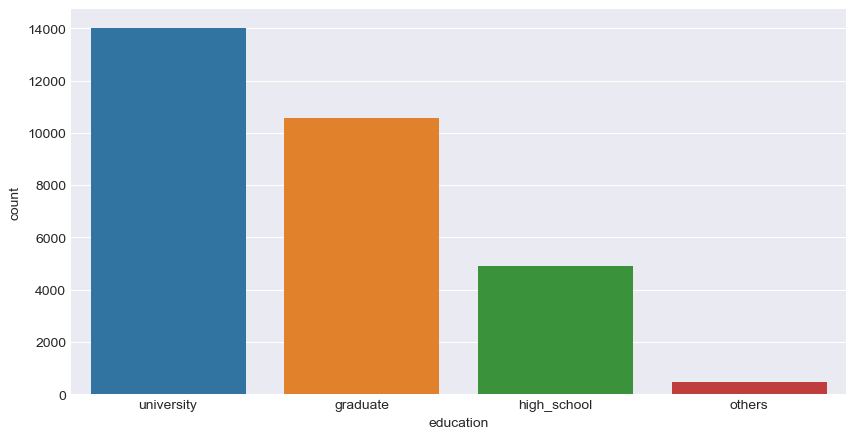

In [43]:
sns.countplot(x = 'education', data = df)
plt.show()

# What is the difference between these charts?



## Exercise 6

Try to replicate the countplot of Seaborn using 
- the barplot of Matplotlib (`plt.bar`)
- the barplot of Seaborn (`sns.barplot`).

*(15 min)*

In [44]:
# Write your code here

## Bar Plot horizontal


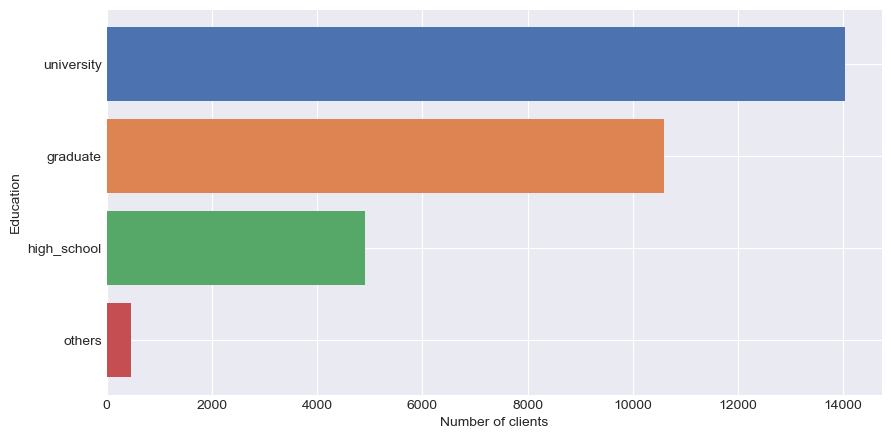

In [45]:
edu_barplot = pd.DataFrame(df.education.value_counts().reset_index()).rename(columns = {'index':'Education', 'education':'Size'})

y_pos = np.arange(len(edu_barplot.Education))

fig, ax = plt.subplots()

ax.barh(y_pos, edu_barplot.Size, color = sns.color_palette('deep'))
ax.set_yticks(y_pos)
ax.set_yticklabels(edu_barplot.Education)
ax.invert_yaxis()  # labels read top-to-bottom
plt.xlabel("Number of clients")
plt.ylabel("Education")
plt.show()


### With the Seaborn's barplot, you just need to simply swap x with y

In [50]:
#sns.barplot(df.default, df.education, ci = None, estimator=np.size)
#plt.xlabel("Number of clients")
#plt.ylabel("Education")
#plt.show()   

## Stacked Plot

In [51]:
edu_stacked_barplot = (df.groupby(['education', 'sex']).id.size()
                         .loc[['university', 'graduate', 'high_school', 'others'],]
                         .reset_index().rename(columns = {'id':'clients'})
                      )
edu_stacked_barplot

,education,sex,clients
0,university,female,8656
1,university,male,5374
2,graduate,female,6231
3,graduate,male,4354
4,high_school,female,2927
5,high_school,male,1990
6,others,female,298
7,others,male,170


In [52]:
men_edu_stacked_barplot = edu_stacked_barplot[edu_stacked_barplot.sex == 'male']
women_edu_stacked_barplot = edu_stacked_barplot[edu_stacked_barplot.sex == 'female']

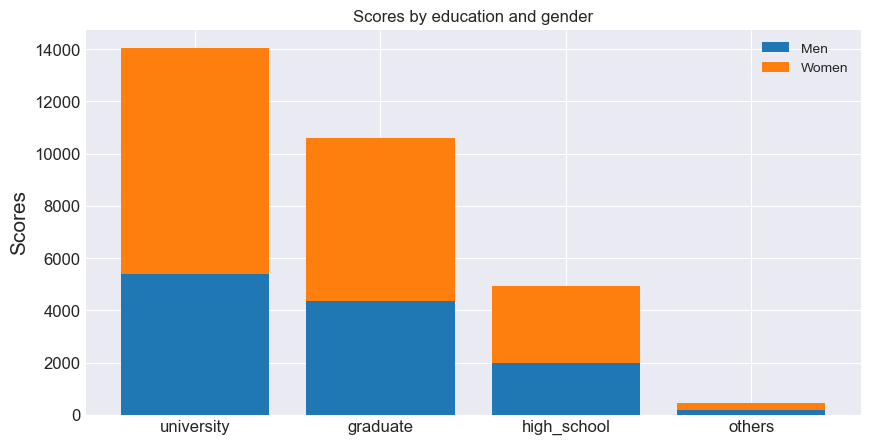

In [53]:
fig, ax = plt.subplots()

ax.bar(men_edu_stacked_barplot.education, men_edu_stacked_barplot.clients, label='Men')
ax.bar(women_edu_stacked_barplot.education, women_edu_stacked_barplot.clients, bottom=list(men_edu_stacked_barplot.clients), label='Women')

ax.set_ylabel('Scores', fontsize = 15)
ax.set_title('Scores by education and gender')
ax.set_xticklabels(men_edu_stacked_barplot.education, fontsize = 12)
ax.set_yticklabels(range(0,16000,2000), fontsize = 12)

ax.legend()
plt.show()

## Grouped Barplot 

## Exercise 7

Try to replicate the plot below.

<img src="img/ex_4_7.png" alt="Exercise 7" style="width:70%;">

Pay attention at:
- the value of each bar is the average of `default` by `education` and `sex`
- the axis labels in the middle of the grouped bars
- the range of the y-axis

*(20 min)*

In [ ]:
# Write your code here

## 5. Boxplots

Standardized way of displaying the distribution of data based on the five number summary: minimum (Min), first quartile (Q1), median (Q2), third quartile (Q3), and maximum (Max)

IQR is the interquartile range or Q3-Q1

Outliers are easily spotted as they are represented as points over the Max segment: Q3 + 1.5*IQR

<img src="img/box_plot.png" alt="Box-plot" style="width:30%;">


In [ ]:
plt.boxplot(x=df.limit_bal)
plt.show()

In [ ]:
sns.boxplot(x=df.education, y=df.limit_bal, linewidth=2)
plt.show()

## Swarm plot & Violin plot

Let's see other type of charts similar to box-plots.

(We select a random sample of the entire dataset for faster plotting. It is not representative of the actual distribution.)

In [ ]:
df_sample = df.sample(1000, random_state=1234)

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.swarmplot('education', 'limit_bal', data=df_sample);
plt.subplot(122)
sns.violinplot('education', 'limit_bal', data=df_sample);

## Heatmap

Heatmaps can be very usefull for the representation of the correlation matrix

In [ ]:
corr = df[[c for c in df.columns if c.startswith('pay')]].corr()
sns.heatmap(corr);

## Exercise 8

Try to replicate the plot below.

<img src="img/ex_4_8.png" alt="Exercise 8" style="width:50%;">

### Pay attention at:
- the limit values of the correlation
- the palette color (see [Seaborn Palette](https://seaborn.pydata.org/tutorial/color_palettes.html))
- the note in each cell
- the `ylim` of the plot

*(10 min)*

In [ ]:
# Write your code here

## Pairplot

One of the most effective charts is the pairs plot (also called a scatterplot matrix). 

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

In [ ]:
sns.pairplot(df, vars = ['age', 'limit_bal', 'pay_avg'], hue = 'education');

## Jointplot

Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

In [ ]:
sns.jointplot(df.age, df.limit_bal, alpha=0.7);

The bivariate graph is quite confusing, let's try to change the parameter `kind`

In [ ]:
sns.jointplot(df.age, df.limit_bal, alpha=0.7, kind="hex");

In [ ]:
sns.jointplot(df.age, df.limit_bal, alpha=0.7, kind="kde");

# Session completed
--------

## Exercise 9
We have the dataset on **Amazon's Top 50 bestselling books** from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

*(20 min)*

In [ ]:
df_amazon=pd.read_csv("data/amazon_bestsellers.csv")
df_amazon.head()

**1.** Plot **Price** distribution of the books by **Genre** (fiction/non fiction)

In [ ]:
# Write here your code

**2.** What is the trend of book **Reviews** year over year for both fiction and non-fiction genres? Plot an appropriate visualization.

In [ ]:
# Write here your code

**3.** How **User Ratings** have changed year over year? Plot an appropriate visualization.

In [ ]:
# Write here your code